In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# You may need to install a custom package named *imutils* to run this notebook. 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.


In [2]:

# Adopted (and modified) from https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imutils import paths
import numpy as np
import imutils # a simple image utility library
import cv2 #opencv library
import os

def image_to_feature_vector(image, size=(32, 32)):
# resize the image to a fixed size, then flatten the image into
# a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [3]:
dataset = "./train"
# grab the list of images that we'll be describing
print("[INFO] describing images...")
imagePaths = list(paths.list_images(dataset))
print(len(imagePaths))
print(imagePaths[0])
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
labels = []

[INFO] describing images...
0


IndexError: list index out of range

In [4]:

# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label (assuming that our
    # path as the format: /path/to/dataset/{class}.{image_num}.jpg
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]

    # extract raw pixel intensity "features", followed by a color
    # histogram to characterize the color distribution of the pixels
    # in the image
    pixels = image_to_feature_vector(image)


    # update the raw images, features, and labels matricies,
    # respectively
    rawImages.append(pixels)
    labels.append(label)

    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

In [6]:
# show some information on the memory consumed by the raw images
# matrix and features matrix
rawImages = np.array(rawImages)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(
    rawImages.nbytes / (1024 * 1000.0)))

NameError: name 'rawImages' is not defined

In [7]:
rawImages.shape

NameError: name 'rawImages' is not defined

In [8]:
32*32*3

3072

In [9]:
data = pd.DataFrame(rawImages)
data.insert(0, 'labels', labels)

NameError: name 'rawImages' is not defined

In [10]:
data.to_csv('cats_dogs.csv', header=False)

NameError: name 'data' is not defined

In [11]:
len(labels)

NameError: name 'labels' is not defined

## Start Here

In [12]:
data = pd.read_csv('cats_dogs.csv', header = None)

In [13]:
data.head()
##accidently left the index....doh

0    1     2     3     4     5     6     7     8     9     ...  3064  3065  \
0     0  cat    93   171   210   103   181   224   114   192  ...     5     1   
1     1  cat    41    37    33    40    42    38    43    43  ...    64    38   
2     2  cat    61    55    46    65    58    49    66    59  ...   108   143   
3     3  cat   217   222   221   229   229   229   228   228  ...   218   200   
4     4  cat    64   100   126    53    92   118    63   104  ...   105    46   

   3066  3067  3068  3069  3070  3071  3072  3073  
0     4     4     1     3     3     1     3     3  
1    45    62    45    48    66    31    36    51  
2   160   162    34   157   169     4   193   194  
3   202   202   215   215   214   207   212   215  
4    72    86    77   101   116    55    82    94  

[5 rows x 3074 columns]

In [14]:
labels = data[1]
X = data.drop([0],axis=1).drop([1],axis=1)

Number is:  cat


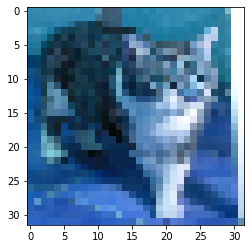

In [16]:
import matplotlib.pyplot as plt
x_ind = np.random.randint(0, len(labels))
img = X.iloc[x_ind,:].values.reshape((32,32,3))
plt.imshow(img)
print('Number is: ', labels[x_ind])
plt.show()